In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')

# Check the current working directory
import os
print(os.getcwd()) 

c:\Users\tishs\Capstone_Project\Notebooks


In [10]:
df1 = pd.read_csv("../Resources/Pivoted_Files/close_pivot.csv")

In [11]:
df1.shape, df1.head()

((1507, 21),
          Date        BND        EFA        HYG       ITOT         IVV  \
 0  2020-01-02  70.398926  58.637089  64.169525  67.128380  298.040649   
 1  2020-01-03  70.650452  57.909771  64.104126  66.715935  295.748108   
 2  2020-01-06  70.566620  58.135483  64.038704  66.972542  296.917175   
 3  2020-01-07  70.507927  57.976643  63.980602  66.761749  296.104309   
 4  2020-01-08  70.398926  58.143852  64.038704  67.064209  297.611328   
 
           IWD         IWF         IWM         MDY  ...       QQQE        SKY  \
 0  121.286789  171.524551  153.705994  349.545685  ...  51.578503  32.110001   
 1  120.472504  170.283905  153.103378  347.723267  ...  51.106407  32.060001   
 2  120.578705  171.370667  153.307327  347.713989  ...  51.143433  32.049999   
 3  120.215820  171.014801  152.797409  346.756195  ...  51.365593  31.719999   
 4  120.472504  172.428558  153.270264  347.379303  ...  51.671055  32.049999   
 
           TLT        VEU         VOO         VTI    

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1507 non-null   object 
 1   BND     1507 non-null   float64
 2   EFA     1507 non-null   float64
 3   HYG     1507 non-null   float64
 4   ITOT    1507 non-null   float64
 5   IVV     1507 non-null   float64
 6   IWD     1507 non-null   float64
 7   IWF     1507 non-null   float64
 8   IWM     1507 non-null   float64
 9   MDY     1507 non-null   float64
 10  QQQ     1507 non-null   float64
 11  QQQE    1507 non-null   float64
 12  SKY     1507 non-null   float64
 13  TLT     1507 non-null   float64
 14  VEU     1507 non-null   float64
 15  VOO     1507 non-null   float64
 16  VTI     1507 non-null   float64
 17  XLE     1507 non-null   float64
 18  XLF     1507 non-null   float64
 19  XLK     1507 non-null   float64
 20  XLV     1507 non-null   float64
dtypes: float64(20), object(1)
memory usag

In [13]:
df1["Date"] = pd.to_datetime(df1["Date"], format='mixed', dayfirst=True)

In [14]:
df1.head()

,Date,BND,EFA,HYG,ITOT,IVV,IWD,IWF,IWM,MDY,...,QQQE,SKY,TLT,VEU,VOO,VTI,XLE,XLF,XLK,XLV
0,2020-01-02,70.398926,58.637089,64.169525,67.128380,298.040649,121.286789,171.524551,153.705994,349.545685,...,51.578503,32.110001,115.443672,45.335083,272.760376,151.060074,23.508682,27.785065,44.349258,92.685570
1,2020-01-03,70.650452,57.909771,64.104126,66.715935,295.748108,120.472504,170.283905,153.103378,347.723267,...,51.106407,32.060001,117.221603,44.760479,270.767792,150.098618,23.438839,27.490053,43.850632,91.877876
2,2020-01-06,70.566620,58.135483,64.038704,66.972542,296.917175,120.578705,171.370667,153.307327,347.713989,...,51.143433,32.049999,116.555916,44.843758,271.782318,150.611389,23.621229,27.472172,43.955097,92.449593
3,2020-01-07,70.507927,57.976643,63.980602,66.761749,296.104309,120.215820,171.014801,152.797409,346.756195,...,51.365593,31.719999,115.983002,44.777138,271.032867,150.254349,23.559135,27.293379,43.936108,92.268097
4,2020-01-08,70.398926,58.143852,64.038704,67.064209,297.611328,120.472504,172.428558,153.270264,347.379303,...,51.671055,32.049999,115.216225,44.885395,272.431305,150.995972,23.171072,27.472172,44.406242,92.867081


In [15]:
df2 = pd.read_csv(r"..\Resources\Raw_Files\FRED\fred_macro_data.csv")

In [16]:
df2["Date"] = pd.to_datetime(df2["Date"], format='mixed', dayfirst=True)

In [17]:
df2.head(), df2.shape

(        Date        GDP  CPI_Inflation  Average_price_of_eggs  \
 0 2020-01-03  21751.238        259.127                  1.461   
 1 2020-01-04  21751.238        259.127                  1.461   
 2 2020-01-05  21751.238        259.127                  1.461   
 3 2020-01-06  21751.238        259.127                  1.461   
 4 2020-01-07  21751.238        259.127                  1.461   
 
    Average_price_of_electricity  Leading_Index_for_US  \
 0                         0.134                  1.57   
 1                         0.134                  1.57   
 2                         0.134                  1.57   
 3                         0.134                  1.57   
 4                         0.134                  1.57   
 
    NBER_Recession_Indicator  Producer_Price_Index  5-Year_Breakeven_Inflation  \
 0                       0.0                 199.3                        1.85   
 1                       0.0                 199.3                        1.85   
 2    

In [18]:
#create a list from the smaller ETF close dataframe to match against the bigger Economic Indicator dataframes on same dates - so as to pull back only matching dates - otherwise this won't work
date_matcher = df1["Date"].tolist()

In [19]:
df2.shape

(2190, 47)

In [20]:
df2 = df2[df2["Date"].isin(date_matcher)] #filtering df2 to only use dates that match those in df1

In [21]:
df1.shape, df2.shape # just one record off - close enough match to successfully proceed

((1507, 21), (1506, 47))

In [22]:
etf_list = df1.columns.to_list()

In [23]:
print(etf_list)

['Date', 'BND', 'EFA', 'HYG', 'ITOT', 'IVV', 'IWD', 'IWF', 'IWM', 'MDY', 'QQQ', 'QQQE', 'SKY', 'TLT', 'VEU', 'VOO', 'VTI', 'XLE', 'XLF', 'XLK', 'XLV']


In [24]:
df1.set_index('Date', inplace=True)
df2.set_index('Date', inplace=True)

etf_list = df1.columns.to_list()

same_dates = df1.index.intersection(df2.index)
feature_cols = df2.loc[same_dates].select_dtypes(include=['number']).columns
X = df2.loc[same_dates, feature_cols].values
Y = df1.loc[same_dates, etf_list].values

feature_names = feature_cols.tolist()

In [25]:
results = {}
for i, etf in enumerate(etf_list):
    y = Y[:, i]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    
    rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    results[etf] = {
        "model": rf,
        "r2": r2_score(y_test, y_pred),
        "rmse": root_mean_squared_error(y_test, y_pred),
        "y_test": y_test,
        "y_pred": y_pred
    }

In [26]:
for etf, metrics in results.items():
    print(f"{etf}: R²={metrics['r2']:.3f}, RMSE={metrics['rmse']:.3f}")

BND: R²=0.995, RMSE=0.261
EFA: R²=0.996, RMSE=0.760
HYG: R²=0.996, RMSE=0.387
ITOT: R²=0.998, RMSE=1.046
IVV: R²=0.999, RMSE=4.016
IWD: R²=0.998, RMSE=1.425
IWF: R²=0.998, RMSE=3.712
IWM: R²=0.994, RMSE=2.521
MDY: R²=0.995, RMSE=5.824
QQQ: R²=0.998, RMSE=4.971
QQQE: R²=0.997, RMSE=0.842
SKY: R²=0.991, RMSE=1.940
TLT: R²=0.999, RMSE=0.765
VEU: R²=0.997, RMSE=0.503
VOO: R²=0.999, RMSE=3.647
VTI: R²=0.998, RMSE=2.356
XLE: R²=0.995, RMSE=0.784
XLF: R²=0.998, RMSE=0.458
XLK: R²=0.998, RMSE=1.145
XLV: R²=0.994, RMSE=1.306


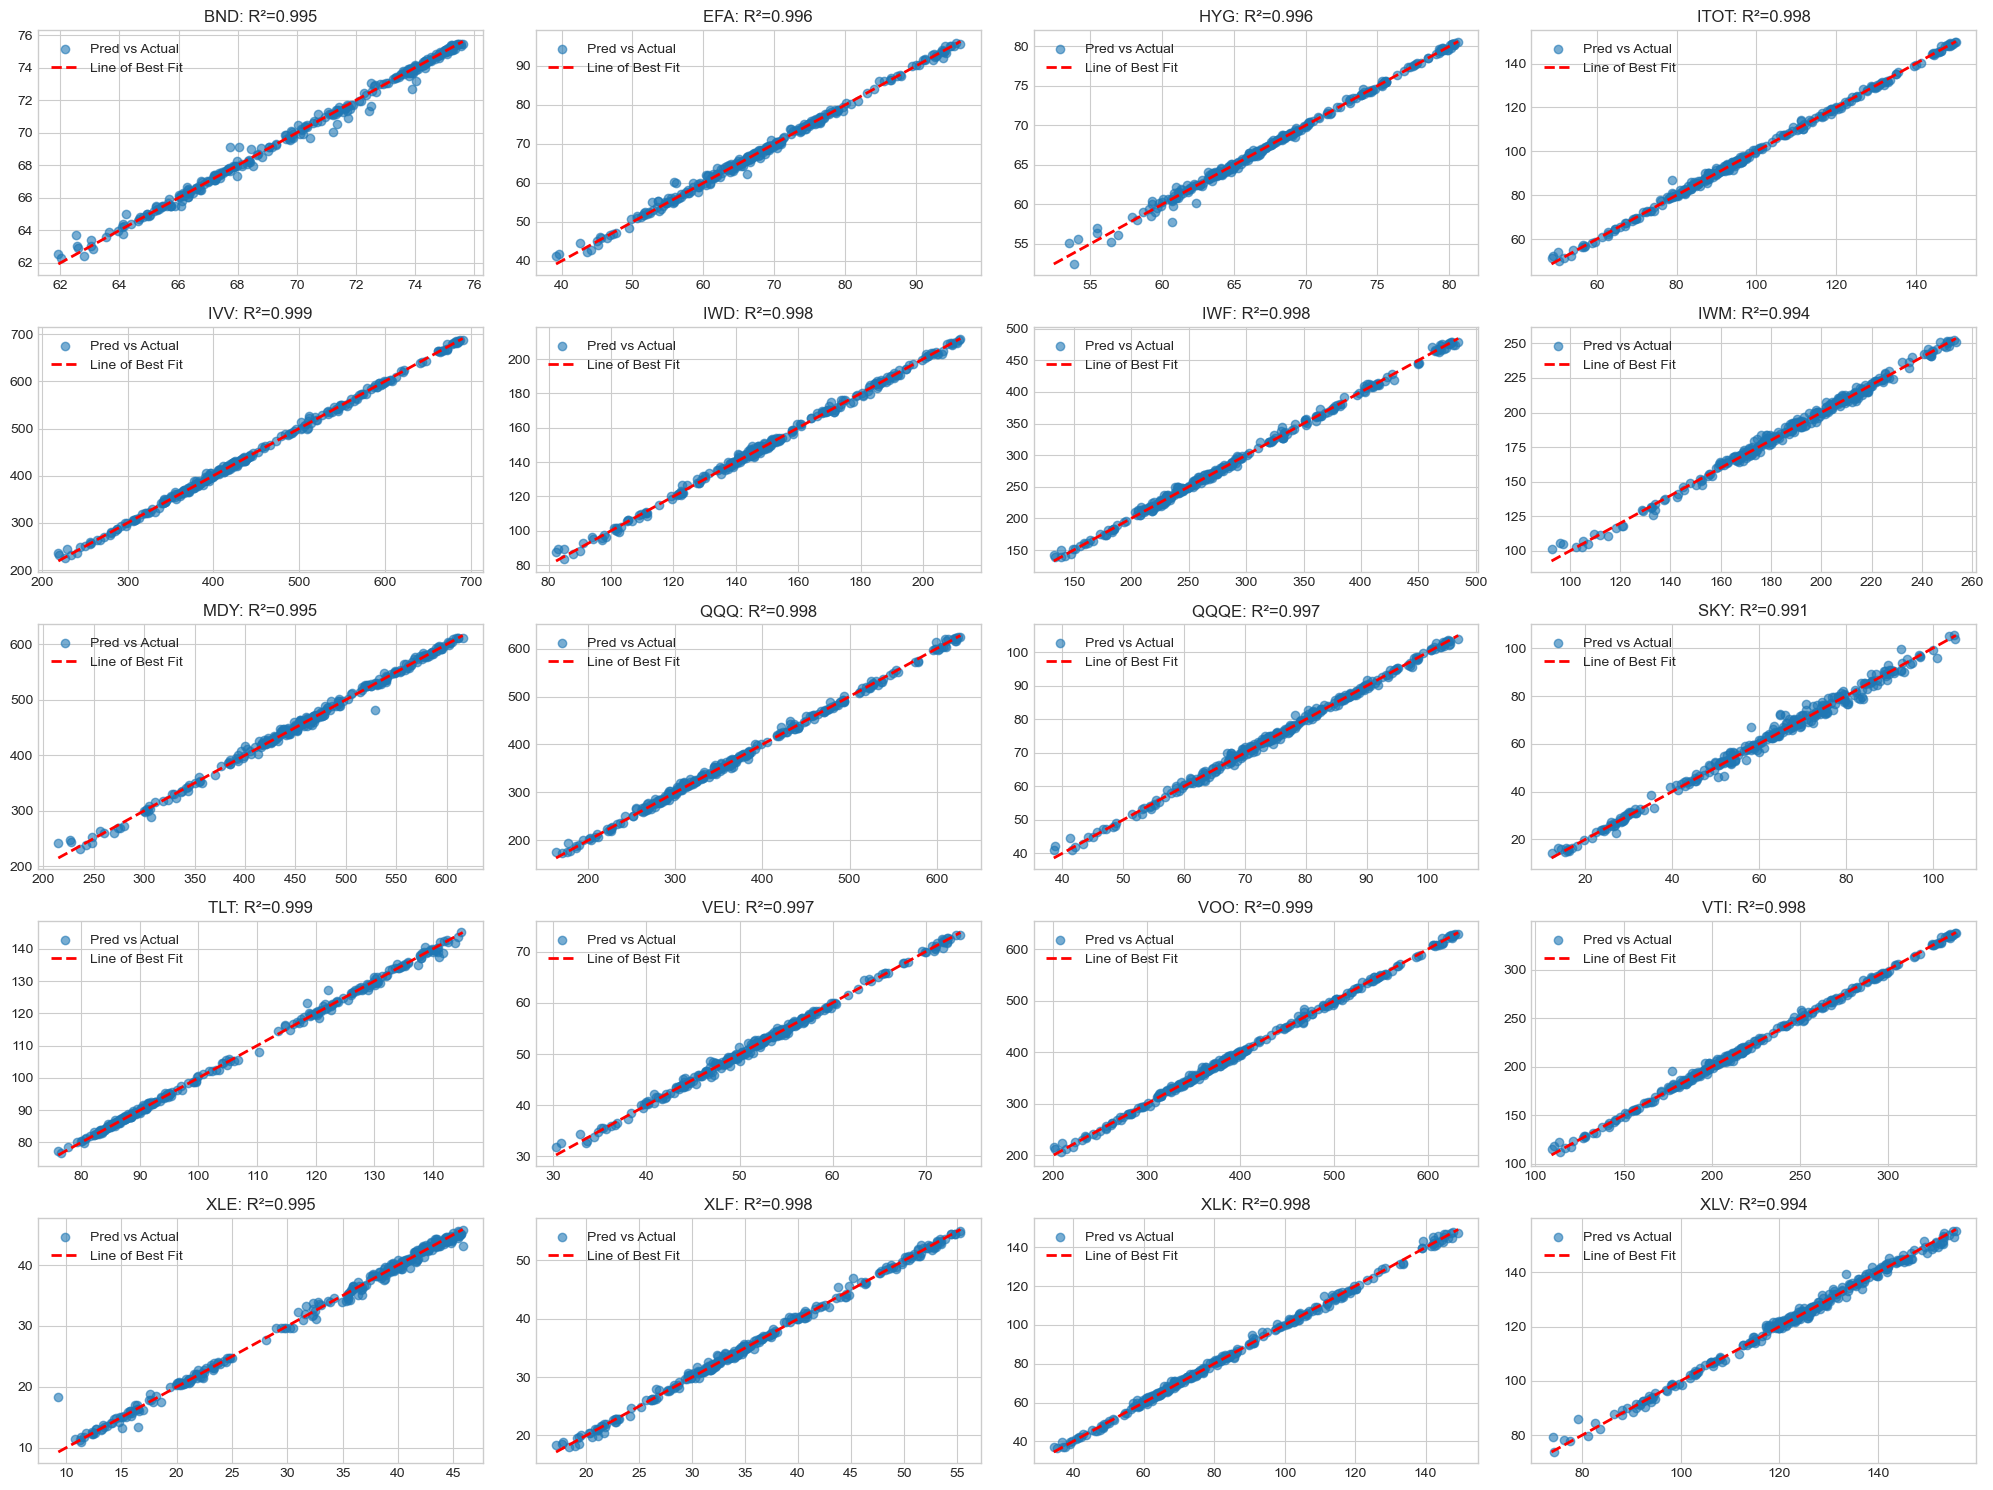

In [27]:
fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()

for i, etf in enumerate(etf_list[:20]):
    ax = axes[i]
    y_test = results[etf]['y_test']
    y_pred = results[etf]['y_pred']
    
    ax.scatter(y_test, y_pred, alpha=0.6, label='Pred vs Actual')
    
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Line of Best Fit')
    
    ax.set_title(f"{etf}: R²={results[etf]['r2']:.3f}")
    ax.legend() 

plt.tight_layout()
plt.show()

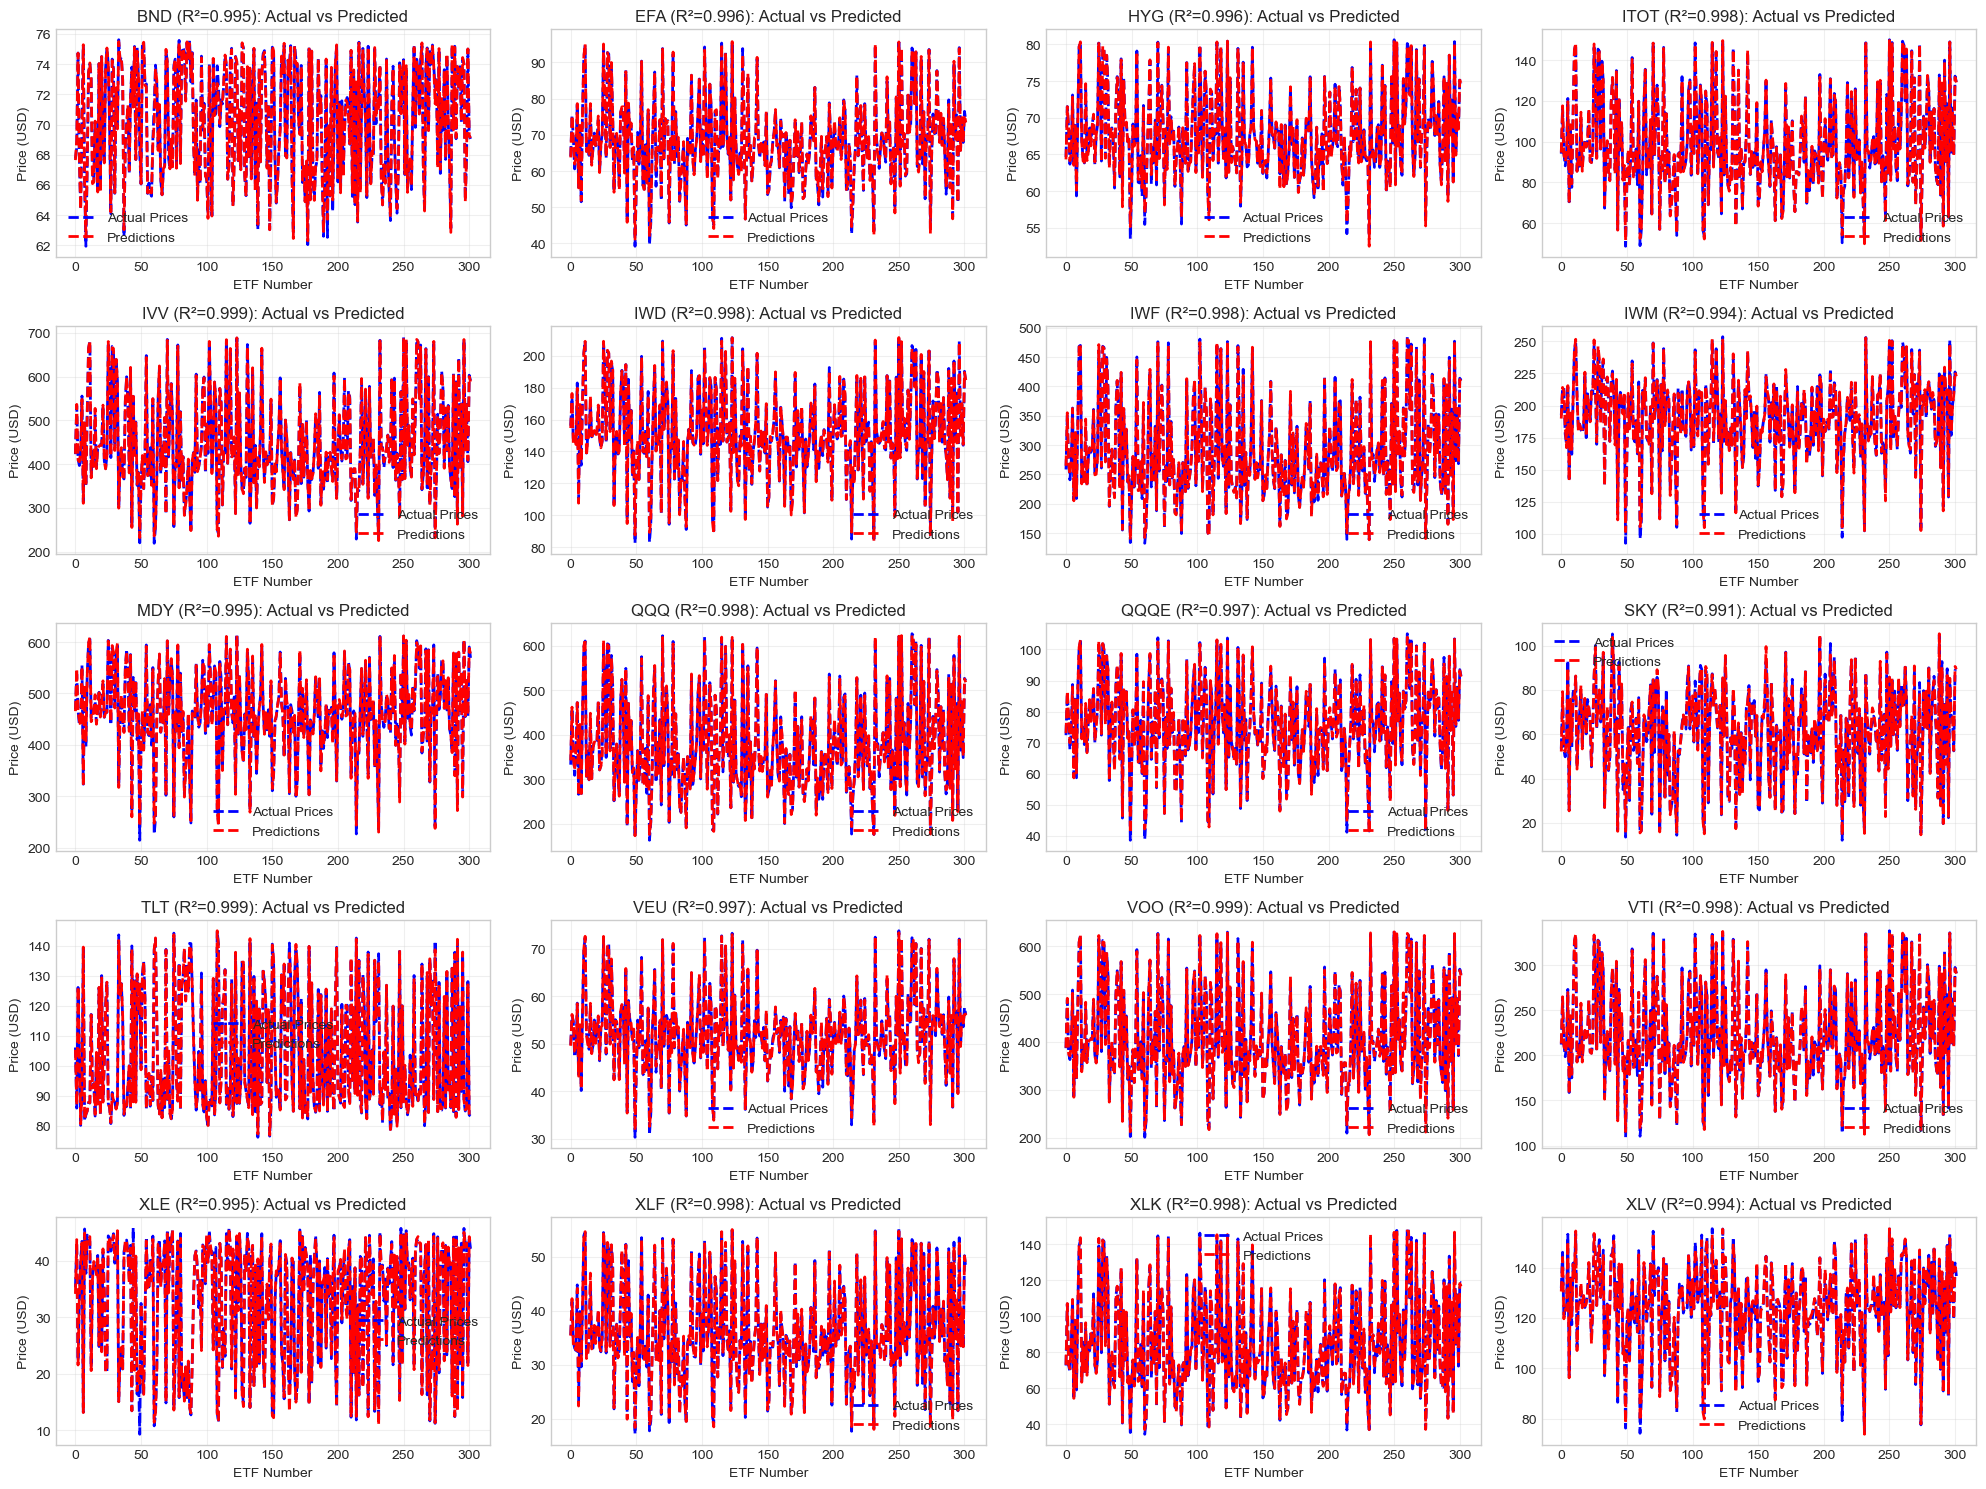

In [28]:
# Simple line plot - Actual vs Predicted

fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()

for i, etf in enumerate(etf_list[:20]):
    ax = axes[i]
    y_test = results[etf]['y_test']
    y_pred = results[etf]['y_pred']
    
    x_axis = np.arange(len(y_test)) 
    
    ax.plot(x_axis, y_test, 'b--', label='Actual Prices', linewidth=2)
    ax.plot(x_axis, y_pred, 'r--', label='Predictions', linewidth=2)
    
    ax.set_xlabel('ETF Number')
    ax.set_ylabel('Price (USD)')
    ax.set_title(f'{etf} (R²={results[etf]['r2']:.3f}): Actual vs Predicted')
    ax.legend()
    ax.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

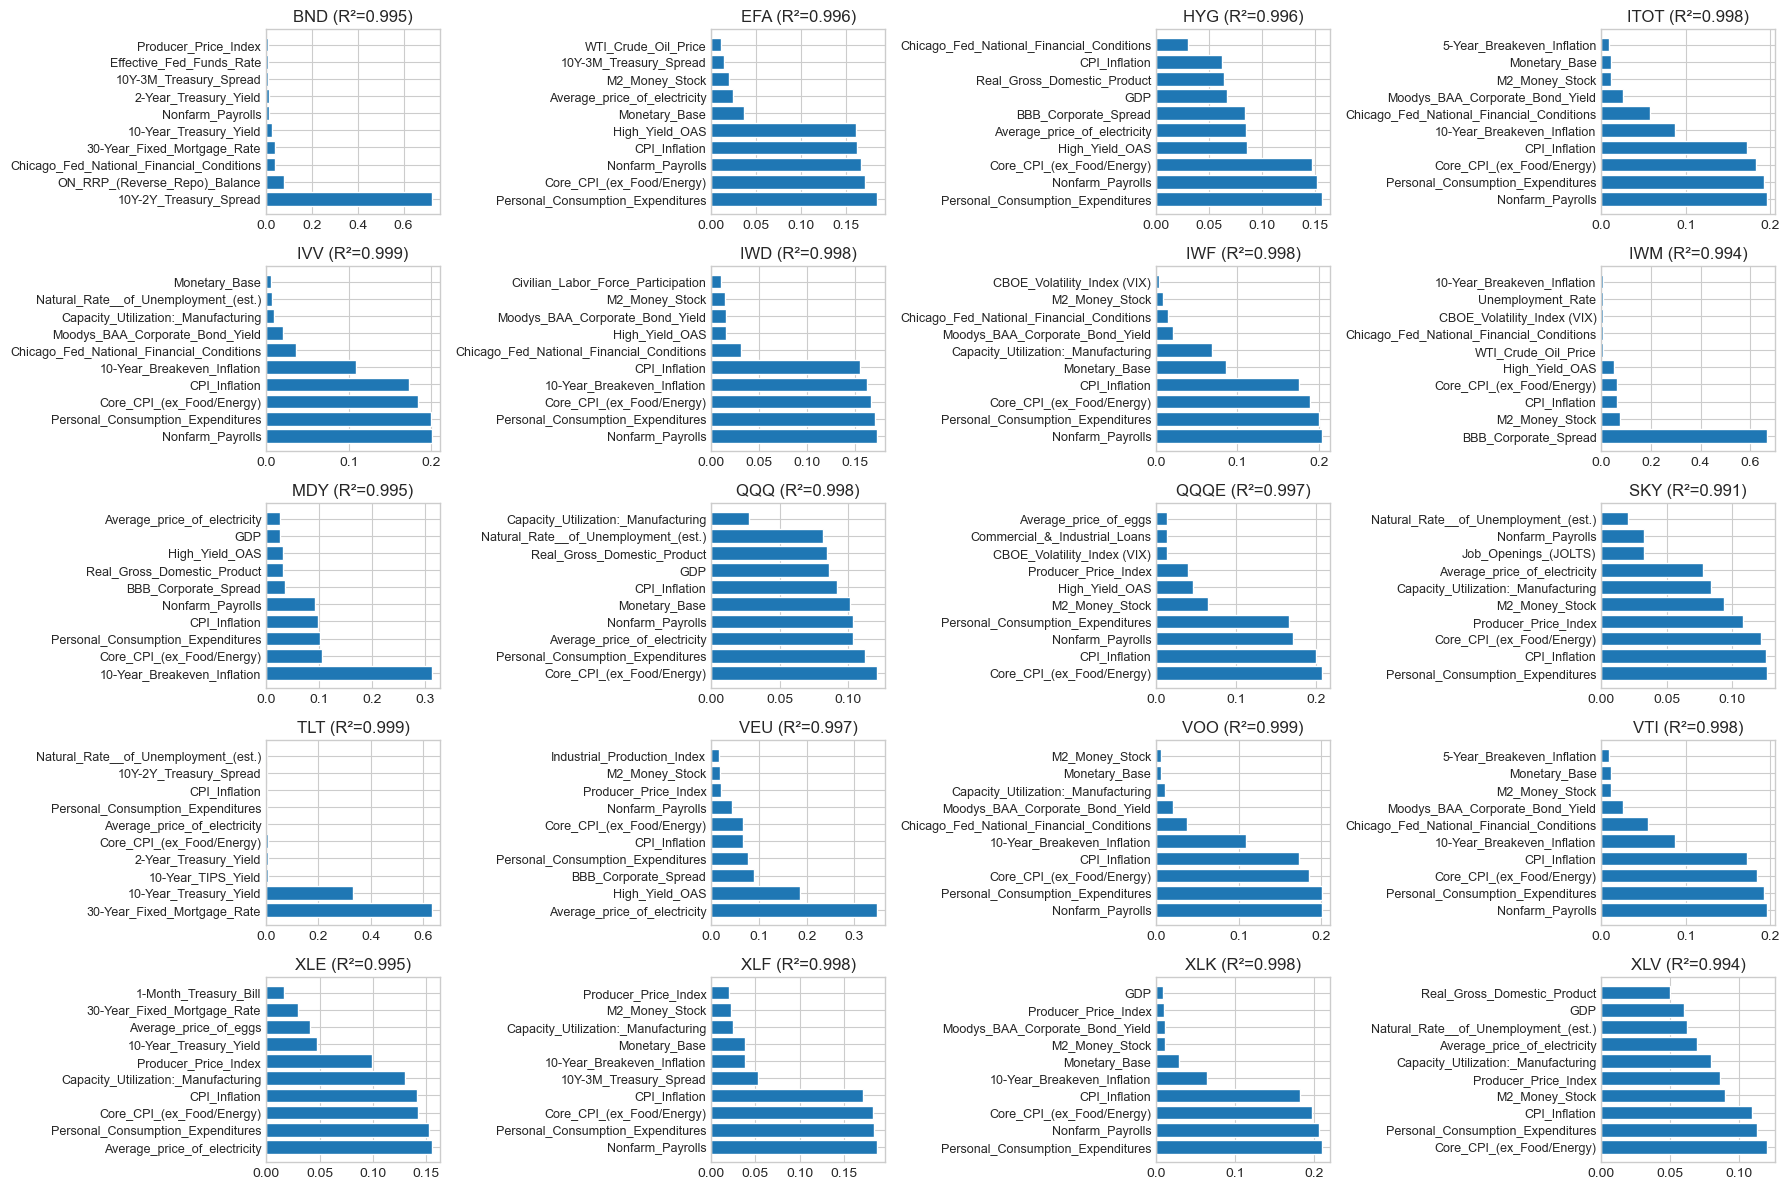

In [29]:
fig, axes = plt.subplots(5, 4, figsize=(18, 12))
axes = axes.flatten()

for idx, etf in enumerate(etf_list[:20]):
    ax = axes[idx]
    model = results[etf]['model']
    importances = model.feature_importances_
    top_idx = np.argsort(importances)[-10:]
    
    ax.barh(range(10), importances[top_idx])
    ax.set_yticks(range(10))
    ax.set_yticklabels([feature_names[i] for i in top_idx], fontsize=9)
    ax.set_title(f"{etf} (R²={results[etf]['r2']:.3f})")
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

In [30]:
imp_df = pd.DataFrame()

for etf in etf_list[:20]:
    model = results[etf]['model']
    importances = model.feature_importances_
    top_idx = np.argsort(importances)[-10:]  # Top 10 per ETF
    df_temp = pd.DataFrame({
        'feature': [feature_names[i] for i in top_idx],
        'importance': importances[top_idx],
        'etf': etf
    })

    imp_df = pd.concat([imp_df, df_temp], ignore_index=True)

# Average importance across ETFs (for features appearing in top 10)
mean_imp = imp_df.groupby('feature')['importance'].mean().sort_values(ascending=False).head(10)

In [31]:
print(f"{mean_imp*100}")

feature
10Y-2Y_Treasury_Spread               36.252998
30-Year_Fixed_Mortgage_Rate          23.368095
BBB_Corporate_Spread                 21.893900
Personal_Consumption_Expenditures    15.244454
Nonfarm_Payrolls                     14.635854
Core_CPI_(ex_Food/Energy)            14.439598
10-Year_Treasury_Yield               13.429274
CPI_Inflation                        13.138879
10-Year_Breakeven_Inflation          10.846468
Average_price_of_electricity          9.893146
Name: importance, dtype: float64


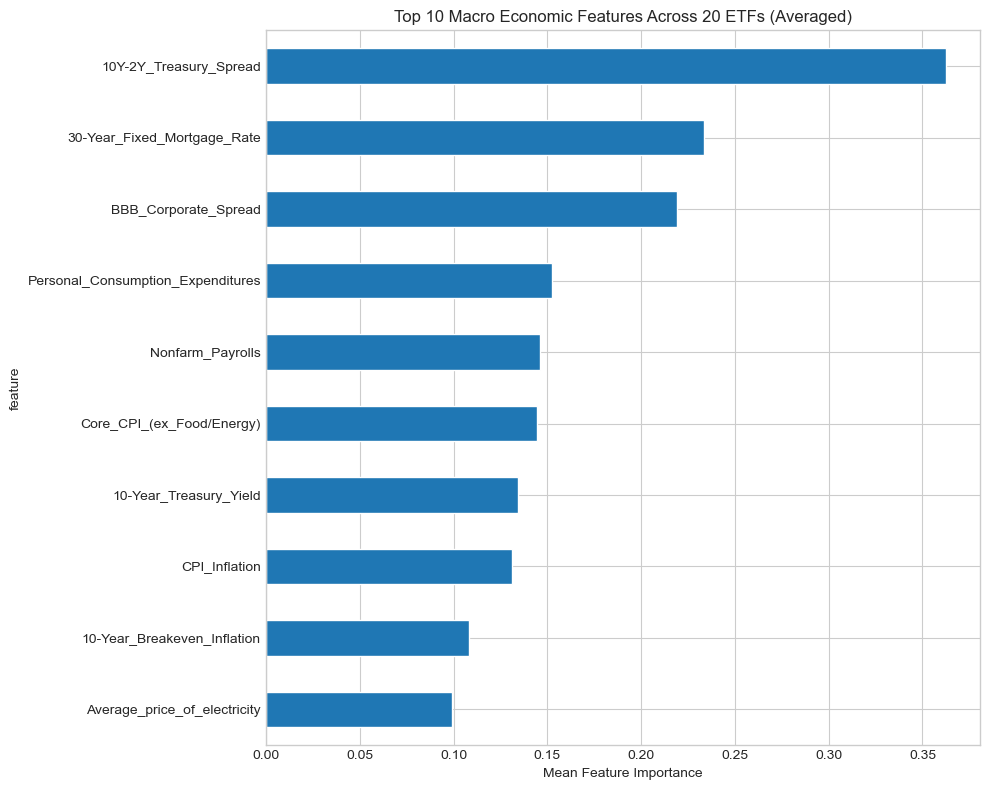

In [32]:
plt.figure(figsize=(10, 8))
mean_imp.plot(kind='barh')
plt.xlabel('Mean Feature Importance')
plt.title('Top 10 Macro Economic Features Across 20 ETFs (Averaged)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()